In [1]:
import keras_segmentation

Using TensorFlow backend.


In [2]:
model = keras_segmentation.pretrained.pspnet_50_ADE_20K()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
!ls

keras_segmentation  README.md	      scripts	 test
LICENSE.txt	    requirements.txt  setup.cfg  test_img.png
out.png		    sample_images     setup.py	 test_pretrained_nets.ipynb


In [4]:
out = model.predict_segmentation(inp='test_img.png', out_fname='out.png')

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

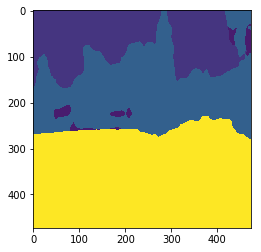

In [7]:
figure = plt.figure()
plt.imshow(out)

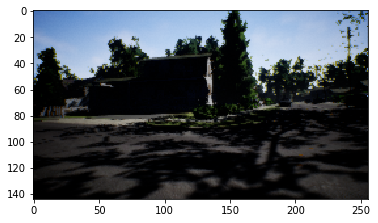

In [8]:
import cv2
img = cv2.imread('test_img.png')
plt.imshow(img[...,::-1])

In [9]:
import numpy as np
width, height = np.shape(out)

In [10]:
img2 = cv2.resize(img, ( width , height ))

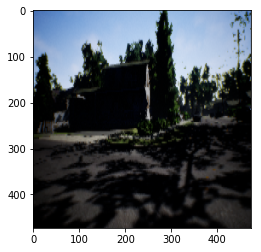

In [11]:
plt.imshow(img2[...,::-1])

In [46]:
np.shape(img2)

(473, 473, 3)

In [12]:
height_origin, width_origin, channel = np.shape(img)

In [13]:
out2 = cv2.resize(out, ( width_origin , height_origin ))

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/resize.cpp:3596: error: (-215:Assertion failed) func != 0 in function 'resize'


In [14]:
width_origin

256

In [15]:
height_origin

144

In [16]:
out

array([[ 2,  2,  2, ...,  4,  4,  4],
       [ 2,  2,  2, ...,  4,  4,  4],
       [ 2,  2,  2, ...,  4,  4,  4],
       ...,
       [13, 13, 13, ..., 13, 13, 13],
       [13, 13, 13, ..., 13, 13, 13],
       [13, 13, 13, ..., 13, 13, 13]])

In [17]:
out2 = cv2.resize(img2, ( width_origin , height_origin ))

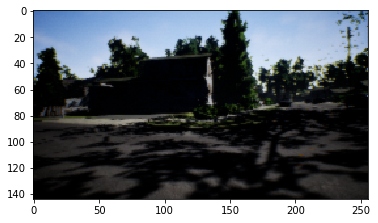

In [18]:
plt.imshow(out2[...,::-1])

In [19]:
out = out.astype(np.float32)

In [20]:
out2 = cv2.resize(out, ( width_origin , height_origin ))

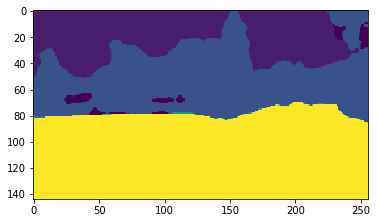

In [21]:
plt.imshow(out2)

In [22]:
out2

array([[ 2.,  2.,  2., ...,  4.,  4.,  4.],
       [ 2.,  2.,  2., ...,  4.,  4.,  4.],
       [ 2.,  2.,  2., ...,  4.,  4.,  4.],
       ...,
       [13., 13., 13., ..., 13., 13., 13.],
       [13., 13., 13., ..., 13., 13., 13.],
       [13., 13., 13., ..., 13., 13., 13.]], dtype=float32)

In [23]:
print(out2[:,0])

[ 2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.5621595  3.939988   4.
  4.         4.         4.         4.         4.         4.
  4.         4.         4.         4.         4.         4.
  4.         4.         4.         4.         4.         4.
  4.         4.         4.         4.         4.         4.
  4.         4.         4.         5.8437805 13.        13.
 13.        13.        13.        13.        13.        13.
 13.        13.        13.        13.        13.        13.
 13.        13.        13.        13.   

In [24]:
def keep_floats(array):
    result = array[array != array.astype(int)]
    return set(result)

In [25]:
def keep_integers(array):
    result = array[array == array.astype(int)]
    return set(result)

In [26]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [27]:
def segmented_data_alignment(input_img):
    for r_id in range(len(input_img)):
        int_arr = list(keep_integers(input_img[r_id]))
        for c_id in range(len(input_img[0])):
            if not float(input_img[r_id][c_id]).is_integer():
                input_img[r_id][c_id] = find_nearest(int_arr, float(input_img[r_id][c_id]))

In [28]:
int_arr = list(keep_integers(out2[0]))

In [29]:
(0.1).is_integer()

False

In [30]:
float_arr = list(keep_floats(out2[0]))
float_arr

[3.8003607]

In [31]:
find_nearest(int_arr, float_arr[0])

4.0

In [32]:
h,w = np.shape(out2)
r_n = 0
for r_id in range(len(out2)):
    int_arr = list(keep_integers(out2[r_id]))
    for c_id in range(len(out2[0])):
        if not float(out2[r_id][c_id]).is_integer():
            out2[r_id][c_id] = find_nearest(int_arr, float(out2[r_id][c_id]))
#         if not (ele).is_integer():
#             ele = find_nearest(int_arr, ele)

In [33]:
print(float(out2[0][0]))

2.0


In [34]:
out2[0]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 4.,
       4., 4., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 4., 4.

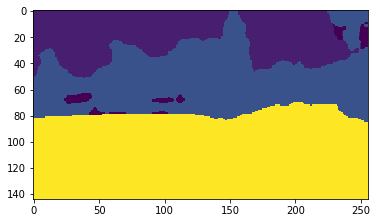

In [35]:
plt.imshow(out2)

In [36]:
np.shape(out)

(473, 473)

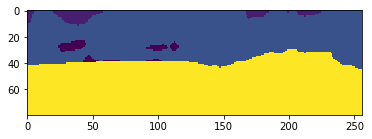

In [37]:
plt.imshow(out2[40:120, :])

In [38]:
np.shape(img)

(144, 256, 3)

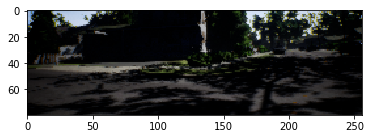

In [39]:
plt.imshow(img[...,::-1][40:120,:,:])

In [40]:
sem_width = sem_height = 80

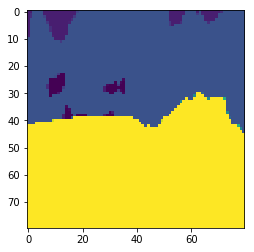

In [49]:
sem_compressed = cv2.resize(out2[40:120, :], ( sem_width , sem_height ))
plt.imshow(sem_compressed)

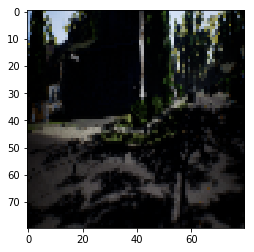

In [42]:
orig_compressed = cv2.resize(img[...,::-1][40:120,:,:], ( sem_width , sem_height )) 
plt.imshow(orig_compressed)

In [45]:
import time
start_time = time.time()
out = model.predict_segmentation(inp='test_img.png', out_fname='out.png')
print(time.time() - start_time)

0.6380007266998291


In [44]:
1/0.4880843162536621

2.0488263332769954

In [47]:
sem_compressed[0]

array([2.       , 2.       , 4.       , 4.       , 4.       , 4.       ,
       2.       , 2.       , 2.       , 2.       , 2.       , 2.       ,
       2.       , 2.       , 2.       , 2.       , 2.       , 2.       ,
       3.4000015, 4.       , 4.       , 4.       , 4.       , 4.       ,
       4.       , 4.       , 4.       , 4.       , 4.       , 4.       ,
       4.       , 4.       , 4.       , 4.       , 4.       , 4.       ,
       4.       , 4.       , 4.       , 4.       , 4.       , 4.       ,
       4.       , 4.       , 4.       , 4.       , 4.       , 4.       ,
       4.       , 4.       , 4.       , 4.       , 2.       , 2.       ,
       2.       , 2.       , 2.       , 2.       , 4.       , 4.       ,
       4.       , 4.       , 2.       , 4.       , 2.       , 2.       ,
       2.       , 2.       , 2.       , 2.       , 2.       , 2.600006 ,
       4.       , 4.       , 4.       , 4.       , 4.       , 4.       ,
       4.       , 4.       ], dtype=float32)

In [50]:
segmented_data_alignment(sem_compressed)
sem_compressed[0]

array([2., 2., 4., 4., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 2., 2., 2., 2., 2., 2., 4., 4., 4., 4., 2., 4., 2., 2., 2., 2.,
       2., 2., 2., 2., 4., 4., 4., 4., 4., 4., 4., 4.], dtype=float32)

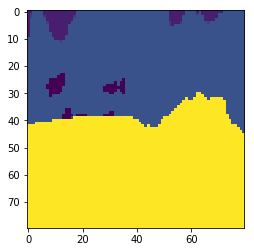

In [51]:
plt.imshow(sem_compressed)

# This part is for the test of the well-tunned image

In [5]:
import keras_segmentation
import cv2
import matplotlib.pyplot as plt

In [3]:
chkpt_path = "./Norm_Data/vgg_unet_1"
# model = keras_segmentation.models.unet.vgg_unet(n_classes=255,  input_height=256, input_width=256)
model = keras_segmentation.predict.model_from_checkpoint_path(checkpoints_path=chkpt_path)

Instructions for updating:
Colocations handled automatically by placer.
loaded weights  ./Norm_Data/vgg_unet_1.439


In [15]:
gt_path = "./Norm_Data/Seg/1561381891.351139.png"
gt_seg_img = cv2.imread(gt_path)
rgb_path = "./Norm_Data/RGB/1561381891.351139.png"
rgb_img = cv2.imread(rgb_path)

In [10]:
gt_seg_img[0]

array([[227, 227, 227],
       [174, 174, 174],
       [174, 174, 174],
       [227, 227, 227],
       [227, 227, 227],
       [174, 174, 174],
       [174, 174, 174],
       [227, 227, 227],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [227, 227, 227],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174, 174],
       [174, 174

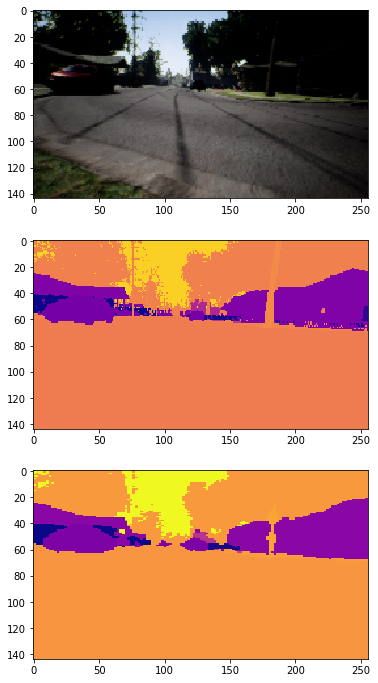

In [31]:
out = model.predict_segmentation(
    inp="./Norm_Data/Experiments/1561381891.351139.png",
    out_fname="/tmp/1561381891.351139.png"
)
figure = plt.figure(figsize=(6,12))
rgb_img_reshaped = cv2.resize(rgb_img, (256, 144), interpolation = cv2.INTER_NEAREST)
gt_img_reshaped = cv2.resize(gt_seg_img, (256, 144), interpolation = cv2.INTER_NEAREST)
out_img_reshaped = cv2.resize(out, (256, 144), interpolation = cv2.INTER_NEAREST)
plt.subplot(311)
plt.imshow(rgb_img_reshaped[...,::-1])
plt.subplot(312)
plt.imshow(gt_img_reshaped[:,:,0], cmap="plasma")
plt.subplot(313)
plt.imshow(out_img_reshaped, cmap="plasma")

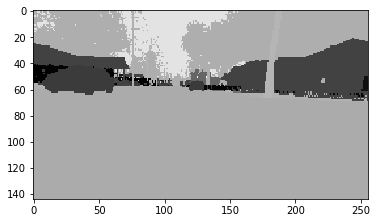

In [26]:
plt.imshow(gt_img_reshaped, cmap="plasma")

In [27]:
gt_img_reshaped[0][0]

array([227, 227, 227], dtype=uint8)

In [29]:
out_img_reshaped[0][0]

227